In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pandas_datareader

[link nguồn tham khảo](https://thinhvu.com/2022/09/22/vnstock-api-tai-du-lieu-chung-khoan-python/)

In [ ]:
!pip install -U vnstock

In [ ]:
from vnstock import * #import all functions

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from math import log2
from scipy.special import rel_entr
from operator import itemgetter
from vnstock import *
import vnstock as vs
import cufflinks as cf
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [ ]:
# VCB =  vs.stock_historical_data(symbol='VCB', start_date="2023-01-01", end_date='2023-01-31')
# VCB.head()

In [ ]:
company_overview('VIC')

,ticker,exchange,industry,companyType,noShareholders,foreignPercent,outstandingShare,issueShare,establishedYear,noEmployees,stockRating,deltaInWeek,deltaInMonth,deltaInYear,shortName,industryEn,industryID,industryIDv2,website
0,VIC,HOSE,Bất động sản,CT,32650,0.122,3823.7,3823.7,2002,313,1.9,0.035,-0.056,-0.359,VinGroup,Real Estate,336,8633,http://www.vingroup.net


In [ ]:
company_profile ('VIC')

,id,companyName,ticker,companyProfile,historyDev,companyPromise,businessRisk,keyDevelopments,businessStrategies
0,None,Tập đoàn Vingroup - Công ty CP,VIC,Tập đoàn Vingroup - Công ty Cổ phần (VIC) có t...,Ngày 03/05/2002: Tiền thân là Công ty Cổ phầ...,"GDP tăng trưởng ổn định, quá trình gia tăng đ...",Áp lực từ việc nguồn vốn đối với một số dự á...,Kinh doanh bất động sản Dịch vụ cho thuê văn...,Triển khai xây dựng mạng lưới showroom tại th...


In [ ]:
company_profile ('VHM')

,id,companyName,ticker,companyProfile,historyDev,companyPromise,businessRisk,keyDevelopments,businessStrategies
0,None,Công ty Cổ phần Vinhomes,VHM,Công ty Cổ phần Vinhomes (VHM) có tiền thân l...,Năm 2008: Tiền thân Công ty Cổ phần Đô thị B...,Các hiệp định kinh tế tự do được ký kết tron...,Thị trường nhà ở đang chịu sự cạnh tranh khố...,"Đầu tư, phát triển và kinh doanh bất động sả...","Công ty sẽ tìm kiếm cơ hội mở rộng quỹ đất, m..."


In [ ]:
company_profile ('VRE')

,id,companyName,ticker,companyProfile,historyDev,companyPromise,businessRisk,keyDevelopments,businessStrategies
0,None,Công ty Cổ phần Vincom Retail,VRE,Công ty Cổ phần Vincom Retail (VRE) có tiền th...,Ngày 11/04/2012: Công ty TNHH Vincom Retail ...,"Theo dự báo của Bộ Công Thương (MoIT), đến n...",Để duy trì việc vận hành các Trung tâm thươn...,Cho thuê các trung tâm thương mại bán lẻ và ...,"Tập trung đầu tư, phát triển thêm các dự án ..."


# Các cổ đông lớn ở Vic

In [ ]:
company_large_shareholders (symbol='VIC')

,ticker,shareHolder,shareOwnPercent
0,VIC,Công Ty Cổ Phần Tập Đoàn Đầu Tư Việt Nam,0.3304
1,VIC,Phạm Nhật Vượng,0.1787
2,VIC,Công Ty Cổ Phần Quản Lý Và Đầu Tư Bất Động Sản...,0.0638
3,VIC,Sk Investment Vina Ii Pte. Ltd,0.0607
4,VIC,Phạm Thu Hương,0.0447
5,VIC,Phạm Thúy Hằng,0.0299
6,VIC,Phan Thu Hương,0.0125
7,VIC,Phạm Hồng Linh,0.0036
8,VIC,Nguyễn Quốc Thành,0.0033
9,VIC,Khác,0.1314


# Thông tin giao dịch nội bộ (Giao dịch theo hợp đồng theo thỏa thuận được công bố mới nhất)

In [ ]:
company_insider_deals (symbol='VIC', page_size=20, page=0)

,ticker,dealAnnounceDate,dealMethod,dealAction,dealQuantity,dealPrice,dealRatio
0,VIC,2023-12-22,Cổ đông nội bộ,Mua,150000.0,43150.0,0.023
1,VIC,2023-12-22,Cổ đông nội bộ,Mua,672000.0,43150.0,0.023
2,VIC,2023-12-22,Cổ đông sáng lập,Mua,150000.0,43150.0,0.023
3,VIC,2023-12-22,Cổ đông sáng lập,Mua,672000.0,43150.0,0.023
4,VIC,2023-03-24,Cổ đông nội bộ,Bán,-50765942.0,53300.0,-0.172
5,VIC,2022-12-23,Cổ đông sáng lập,Bán,-20000.0,55100.0,-0.199
6,VIC,2022-11-23,Cổ đông sáng lập,Mua,20000.0,59700.0,-0.260
7,VIC,2022-11-18,Cổ đông nội bộ,Bán,-243462578.0,65600.0,-0.327
8,VIC,2022-11-18,Cổ đông lớn,Mua,243462578.0,65600.0,-0.327
9,VIC,2022-03-03,Cổ đông sáng lập,Mua,935000.0,79000.0,-0.441


# Danh sách công ty con, công ty liên kết

In [ ]:
company_subsidiaries_listing (symbol='VIC', page_size=100, page=0)

,ticker,subCompanyName,subOwnPercent
0,VIC,Công ty Cổ Phần Công Nghệ Sinh Học Vinbiocare,1.000
1,VIC,Công ty Cổ phần Đầu tư kinh doanh và Thương mạ...,1.000
2,VIC,Công Ty Cổ Phần Giải Pháp Và Dịch Vụ Công Nghệ...,1.000
3,VIC,Công ty Cổ phần Vinpearl,1.000
4,VIC,Công ty CP Đầu Tư Và Phát Triển Khách Sạn Land...,1.000
...,...,...,...
95,VIC,Công ty TNHH Đá Cẩm Thạch An Phú,0.667
96,VIC,Công Ty Tnhh Một Thành Viên Khai Thác Khoáng S...,0.667
97,VIC,Công ty TNHH MTV Đá Trắng Bảo Lai,0.667
98,VIC,Công ty Cổ phần Sách Việt Nam,0.653


In [ ]:
company_subsidiaries_listing (symbol='VHM', page_size=100, page=0)

,ticker,subCompanyName,subOwnPercent
0,VHM,Công Ty Cổ Phần Đầu Tư Khu Công Nghiệp Vinhomes,1.000
1,VHM,Công ty Cổ Phần Đầu Tư Xây Dựng Đại An,1.000
2,VHM,Công ty Cổ Phần Đầu Tư Xây Dựng Đại An,1.000
3,VHM,Công Ty Cổ Phần Muối Cam Ranh,1.000
4,VHM,Công ty Cổ Phần Phát Triển Gs Củ Chi,1.000
5,VHM,Công ty CP Phát Triển Và Đầu Tư Xây Dựng Vincons,1.000
6,VHM,Công ty TNHH Metropolis Hà Nội,1.000
7,VHM,Công ty TNHH Thương Mại Đầu Tư Và Phát Triển T...,1.000
8,VHM,Công Ty Cổ Phần Phát Triển Kinh Doanh Bất Động...,0.999
9,VHM,Công ty CP Đầu Tư Hiệp Thành Công,0.999


#### Báo cáo tài chính

* Income Statement: Báo cáo doanh thu

* Balance Sheet: Bảng cân đối kế toán

* Cashflow: Báo cáo lưu chuyển tiền tệ

Dữ liệu trả về có đơn vị mặc định Tỷ VND

In [ ]:
#báo cáo theo từng quý :Quarterly, năm: Yearly

income_df = financial_report (symbol='VIC', report_type='IncomeStatement', frequency='Yearly', periods=5, latest_year=None)
income_df

,CHỈ TIÊU,2019,2020,2021,2022,2023
0,Doanh số,1.301614e+14,1.107555e+14,1.257808e+14,1.018095e+14,1.616670e+14
1,Các khoản giảm trừ,-1.253840e+11,-2.654640e+11,-9.289100e+10,-1.594700e+10,-3.268100e+10
2,Doanh số thuần,1.300360e+14,1.104900e+14,1.256879e+14,1.017936e+14,1.616343e+14
3,Giá vốn hàng bán,-9.248480e+13,-9.317723e+13,-9.162316e+13,-8.709975e+13,-1.376283e+14
4,Lãi gộp,3.755122e+13,1.731281e+13,3.406470e+13,1.469383e+13,2.400603e+13
5,Thu nhập tài chính,1.400089e+13,3.106841e+13,1.604590e+13,3.304810e+13,2.119794e+13
6,Chi phí tài chính,-8.181371e+12,-1.280456e+13,-1.136367e+13,-1.432630e+13,-2.251758e+13
7,Trong đó: Chi phí lãi vay,-7.147357e+12,-1.140238e+13,-1.028889e+13,-1.094422e+13,-1.741004e+13
8,Lãi/(lỗ) từ công ty liên doanh,-6.884430e+11,-2.652780e+11,-4.166800e+10,-8.652400e+10,-9.782500e+10
9,Chi phí bán hàng,-1.424845e+13,-7.253585e+12,-6.909908e+12,-9.371097e+12,-1.204322e+13


### 📈 Historical Price | Giá lịch sử

In [ ]:
### 📈 Historical Price | Giá lịch sử

In [ ]:
import pandas as pd


In [ ]:

# Kết quả từ hàm stock_historical_data
resul_VIC = stock_historical_data("VIC", "2014-01-01", "2024-03-13", "1D", type="stock", beautify=True, decor=False, source='DNSE')

resul_VIC.to_csv('vicStock.csv', index=False)

In [ ]:
resul_VHM = stock_historical_data("VHM", "2019-01-01", "2024-03-13", "1D", type="stock", beautify=True, decor=False, source='DNSE')


resul_VHM.to_csv('vhm_data.csv', index=False)

In [ ]:
resul_VRE = stock_historical_data("VRE", "2019-01-01", "2024-03-13", "1D", type="stock", beautify=True, decor=False, source='DNSE')


resul_VRE.to_csv('vre_data.csv', index=False)

Comparison | So sánh cổ phiếu (giữa họ nhà Vin với giá hiện tại)

In [ ]:
price_depth('VIC,VHM,VRE')

,Mã CP,Giá tham chiếu,Giá Trần,Giá Sàn,Giá mua 3,KL mua 3,Giá mua 2,KL mua 2,Giá mua 1,KL mua 1,...,Giá bán 1,KL bán 1,Giá bán 2,KL bán 2,Giá bán 3,KL bán 3,Tổng Khối Lượng,ĐTNN Mua,ĐTNN Bán,ĐTNN Room
0,VIC,44350,47450,41250,44150,6720,44100,4870,44050,4530,...,44200,120,44250,10,44300,2610,283660,99087,22237,1390400540
1,VHM,42550,45500,39600,42650,10,42600,950,42550,6360,...,42700,970,42750,3730,42800,34590,475620,149473,96961,1216622996
2,VRE,24500,26200,22800,25050,500,25000,1030,24950,1000,...,25200,12790,25250,9600,25300,4990,1011170,363538,132246,449910318


# Chỉ số VN30 trong VNIndex sàn HoSe

In [ ]:
df =listing_companies()
df


In [ ]:
# Sử dụng value_counts để đếm số lần xuất hiện của mỗi giá trị và hiển thị kết quả
comGroupCode_counts = df['comGroupCode'].value_counts()

print("Số lượng và loại 'comGroupCode':")
print(comGroupCode_counts)

Số lượng và loại 'comGroupCode':
comGroupCode
UPCOM    865
HOSE     411
HNX      331
Name: count, dtype: int64


In [ ]:
# Lọc DataFrame để chỉ bao gồm các dòng có giá trị True trong cột 'VN30'
top_30_hose_stocks = df[(df['VN30'] == True)]
# top_30_hose_stocks = df[(df['comGroupCode'] == 'HOSE') & (df['VN30'] == True)]

print("VN30 trong sàn Hose:")
print(top_30_hose_stocks[['ticker', 'VN30']])

VN30 trong sàn Hose:
   ticker  VN30
0     SSI  True
1     BCM  True
2     VHM  True
3     VIC  True
4     VRE  True
5     BVH  True
6     POW  True
7     GAS  True
8     ACB  True
9     BID  True
10    CTG  True
11    HDB  True
12    MBB  True
13    SSB  True
14    SHB  True
15    STB  True
16    TCB  True
17    TPB  True
18    VCB  True
19    VIB  True
20    VPB  True
21    HPG  True
22    GVR  True
23    MSN  True
24    VNM  True
25    SAB  True
26    VJC  True
27    MWG  True
28    PLX  True
29    FPT  True


In [ ]:
# Sort the VN30 stocks alphabetically by ticker
sorted_vn30_stocks = top_30_hose_stocks.sort_values(by='ticker')

# Display the sorted VN30 stocks
print("Sorted VN30 stocks:")
print(sorted_vn30_stocks[['ticker', 'VN30']])


Sorted VN30 stocks:
   ticker  VN30
8     ACB  True
1     BCM  True
9     BID  True
5     BVH  True
10    CTG  True
29    FPT  True
7     GAS  True
22    GVR  True
11    HDB  True
21    HPG  True
12    MBB  True
23    MSN  True
27    MWG  True
28    PLX  True
6     POW  True
25    SAB  True
14    SHB  True
13    SSB  True
0     SSI  True
15    STB  True
16    TCB  True
17    TPB  True
18    VCB  True
2     VHM  True
19    VIB  True
3     VIC  True
26    VJC  True
24    VNM  True
20    VPB  True
4     VRE  True


In [ ]:
# List of VN30 tickers
vn30_tickers = top_30_hose_stocks['ticker'].tolist()

# Create an empty list to store company information DataFrames
company_info_dfs = []

# Retrieve company information for VN30 tickers
for ticker in vn30_tickers:
    company_info = df[df['ticker'] == ticker][['ticker', 'organName', 'organShortName', 'sector', 'industry']].iloc[0]
    company_info_dfs.append(company_info)

# Concatenate all company information DataFrames into a single DataFrame
vn30_company_info = pd.concat(company_info_dfs, axis=1).T

# Display the company information for VN30 stocks
print("Company information for VN30 stocks:")
vn30_company_info


Company information for VN30 stocks:


,ticker,organName,organShortName,sector,industry
0,SSI,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,Tài chính,Dịch vụ tài chính
1,BCM,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,Tài chính,Bất động sản
2,VHM,Công ty Cổ phần Vinhomes,Vinhomes,Tài chính,Bất động sản
3,VIC,Tập đoàn Vingroup - Công ty CP,VinGroup,Tài chính,Bất động sản
4,VRE,Công ty Cổ phần Vincom Retail,Vincom Retail,Tài chính,Bất động sản
5,BVH,Tập đoàn Bảo Việt,Tập đoàn Bảo Việt,Tài chính,Bảo hiểm
6,POW,Tổng Công ty Điện lực Dầu khí Việt Nam - CTCP,Điện lực Dầu khí Việt Nam,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt"
7,GAS,Tổng Công ty Khí Việt Nam - Công ty Cổ phần,PV Gas,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt"
8,ACB,Ngân hàng Thương mại Cổ phần Á Châu,ACB,Ngân hàng,Ngân hàng
9,BID,Ngân hàng Thương mại Cổ phần Đầu tư và Phát tr...,BIDV,Ngân hàng,Ngân hàng


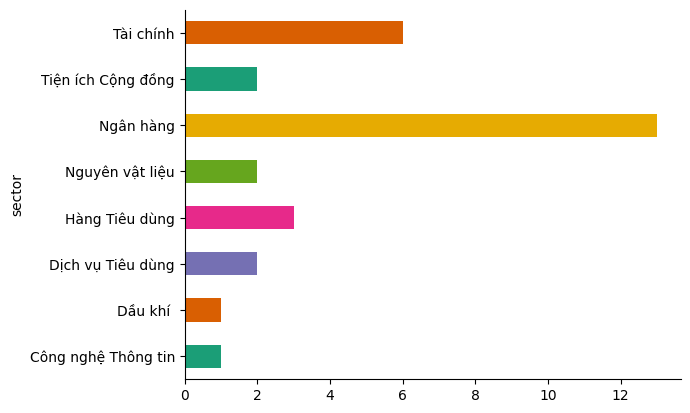

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
vn30_company_info.groupby('sector').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

vn30_tickers = top_30_hose_stocks['ticker'].tolist()

# Tải dữ liệu cho từng mã chứng khoán trong VN30
vn30_data = {}
for ticker in vn30_tickers:
    try:
        data = vs.stock_historical_data(symbol=ticker, start_date="2019-01-01", end_date='2023-12-31', source='DNSE')
        vn30_data[ticker] = data
    except:
        print(f"Failed to load data for {ticker}")

# Hiển thị dữ liệu của một số mã trong VN30
for ticker, data in vn30_data.items():
    print(f"\n{ticker} Data:")
    print(data.head())



SSI Data:
         time   open   high    low  close   volume ticker
0  2019-01-02  12140  12230  11930  12050  1216350    SSI
1  2019-01-03  12050  12050  11710  11810  1672220    SSI
2  2019-01-04  11810  11910  11560  11810  1232910    SSI
3  2019-01-07  12180  12180  11840  11840   735500    SSI
4  2019-01-08  11890  11890  11660  11680  1306960    SSI

BCM Data:
         time   open   high    low  close  volume ticker
0  2019-01-02  22840  22840  20890  22290   32500    BCM
1  2019-01-03  21360  21360  20430  20430   12700    BCM
2  2019-01-04  20890  21080  20890  21080    4700    BCM
3  2019-01-07  19870  21080  18480  20980  222600    BCM
4  2019-01-08  21170  21170  20890  21080    6900    BCM

VHM Data:
         time   open   high    low  close  volume ticker
0  2019-01-02  53700  53700  52970  53550  334420    VHM
1  2019-01-03  52530  53330  52090  53330  475210    VHM
2  2019-01-04  52460  54280  51660  53910  277640    VHM
3  2019-01-07  54350  54350  53400  54060  186030

In [ ]:
vn30_dfs = list(vn30_data.values())

vn30_stock = pd.concat(vn30_dfs, ignore_index=True)

print("\nConcatenated DataFrame (vn30_stock):")
vn30_stock



Concatenated DataFrame (vn30_stock):


,time,open,high,low,close,volume,ticker
0,2019-01-02,12140,12230,11930,12050,1216350,SSI
1,2019-01-03,12050,12050,11710,11810,1672220,SSI
2,2019-01-04,11810,11910,11560,11810,1232910,SSI
3,2019-01-07,12180,12180,11840,11840,735500,SSI
4,2019-01-08,11890,11890,11660,11680,1306960,SSI
...,...,...,...,...,...,...,...
36935,2023-12-25,94900,96200,94800,96000,2017000,FPT
36936,2023-12-26,96500,98600,96400,97200,3359900,FPT
36937,2023-12-27,97400,97800,96900,96900,1355900,FPT
36938,2023-12-28,97000,97000,96300,96600,1196600,FPT


In [ ]:
# Save the DataFrame to a CSV file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/PTDL/ComVN30_train.csv'  # Update the path as needed
vn30_stock.to_csv(file_path, index=False)



In [ ]:

# vn30_tickers = top_30_hose_stocks['ticker'].tolist()
# Tải dữ liệu cho từng mã chứng khoán trong VN30
vn30_test = {}
for ticker in vn30_tickers:
    try:
        data = vs.stock_historical_data(symbol=ticker, start_date="2024-01-01", end_date='2024-05-01')
        vn30_test[ticker] = data
    except:
        print(f"Failed to load data for {ticker}")

In [ ]:
TestVN30_dfs = list(vn30_test.values())

ComVN30_test = pd.concat(TestVN30_dfs, ignore_index=True)

print("\nConcatenated DataFrame (ComVN30_test):")
ComVN30_test


Concatenated DataFrame (ComVN30_test):


,time,open,high,low,close,volume,ticker
0,2024-01-02,33000,33200,32500,32500,18052300,SSI
1,2024-01-03,32350,32950,32299,32950,11408700,SSI
2,2024-01-04,33000,34200,33000,33600,58713300,SSI
3,2024-01-05,33800,34150,33600,34150,25137200,SSI
4,2024-01-08,34450,34500,34000,34100,20729000,SSI
...,...,...,...,...,...,...,...
2335,2024-04-22,110000,111400,108900,110300,2397300,FPT
2336,2024-04-23,110900,113300,109900,112300,4037600,FPT
2337,2024-04-24,113600,120100,113200,120100,10158700,FPT
2338,2024-04-25,122500,128000,121900,123200,5707700,FPT


In [ ]:
# Save the DataFrame to a CSV file in Google Drive
file_path_test = '/content/drive/MyDrive/Colab Notebooks/PTDL/ComVN30_test.csv'  # Update the path as needed
ComVN30_test.to_csv(file_path_test, index=False)

In [ ]:
# vn30_stock_list = pd.concat(vn30_dfs, axis=1)

# print("\nList of DataFrames (bank_stock_list):")
# vn30_stock_list

In [ ]:
# !pip install happybase


In [ ]:
vn30_stock = pd.concat(vn30_dfs, ignore_index=True)

vn30_stock_pivoted = vn30_stock.pivot(index='time', columns='ticker')

print("\nPivoted DataFrame (vn30_stock_pivoted):")
vn30_stock_pivoted


Pivoted DataFrame (vn30_stock_pivoted):


open                                                          \
ticker        ACB    BCM    BID    BVH    CTG    FPT    GAS    GVR    HDB   
time                                                                        
2023-06-01  21500  76950  39050  42470  25060  71370  75200  18030  16000   
2023-06-02  21500  76650  39050  42860  25100  70940  74230  18620  16260   
2023-06-05  22000  76950  39840  43640  25860  71290  74470  18470  16700   
2023-06-06  21800  77240  39930  43490  25820  72470  76000  17880  16520   
2023-06-07  21800  76850  39760  43930  25820  72220  76570  18570  16700   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-12-25  23250  61200  42500  38950  26550  94900  74700  20300  18950   
2023-12-26  23400  61900  43200  39150  26850  96500  76700  20250  19200   
2023-12-27  23200  62200  42800  39500  26800  97400  76400  20300  19200   
2023-12-28  23300  62600  43000  39600  26850  97000  76400  20350  19200   
2023-12-29  23900  62700  42700  39600  27200  96600  76200  20450  19400   

                   ...    volume                                         \
ticker        HPG  ...       TCB       TPB      VCB       VHM       VIB   
time               ...                                                    
2023-06-01  21150  ...   4776200  13565100   646300    913700   4251200   
2023-06-02  21500  ...  13798700  12079200   737800   1356400  21473100   
2023-06-05  21800  ...   5861900   9601600  1297800   1430700   8326700   
2023-06-06  21700  ...   6000100  10016600   759500   1361500   9666600   
2023-06-07  22000  ...   4964100   9305100   749600   1857300   7241900   
...           ...  ...       ...       ...      ...       ...       ...   
2023-12-25  27150  ...   2572700   2546800  1301600   5957700   1528200   
2023-12-26  27400  ...   1507400   2029300   971200  10394700   1730300   
2023-12-27  27850  ...   2015600   5355700   899600   6034200   1900200   
2023-12-28  27750  ...   5753400   3898200   703200  13129900   5151100   
2023-12-29  27950  ...   4231700   3046800  1621700   5324500   8957600   

                                                          
ticker          VIC      VJC      VNM       VPB      VRE  
time                                                      
2023-06-01  1526900   491600  1214500   9750400  4879700  
2023-06-02  1731400   592600  2969700  24536300  2949200  
2023-06-05  1824300   604000  3323000  13421500  3292300  
2023-06-06  2120200   480600  3423000  14948300  2329600  
2023-06-07  1656100   478300  3719000  16189900  3217500  
...             ...      ...      ...       ...      ...  
2023-12-25  1977500   776700  2672700   8637100  3420400  
2023-12-26  1763700   901400  1975400   8402900  2651000  
2023-12-27  1848500  1381000  1626400   7673900  3220300  
2023-12-28  4070700  1594600  2408700  10315400  6105000  
2023-12-29  2168900  2055200  1954700  17010800  4354700  

[150 rows x 150 columns]

# Dữ liệu lưu trữ giống với cấu trúc Hbase thì sẽ như sau:

In [ ]:
vn30_stock = pd.concat(vn30_dfs, ignore_index=True)

vn30_stock_pivoted = vn30_stock.pivot_table(index='time', columns=['ticker'], values=['open', 'high', 'low', 'close', 'volume'])


vn30_stock_pivoted = vn30_stock_pivoted.reorder_levels([1, 0], axis=1)
vn30_stock_pivoted.sort_index(axis=1, level=0, inplace=True)
print("\nPivoted DataFrame (vn30_stock_pivoted):")
vn30_stock_pivoted.head()




Pivoted DataFrame (vn30_stock_pivoted):


ticker        ACB                                   BCM                       \
            close   high    low   open    volume  close   high    low   open   
time                                                                           
2023-06-01  21400  21750  21250  21500  12761200  76650  76950  76260  76950   
2023-06-02  21800  22100  21450  21500  15030000  76950  76950  76260  76650   
2023-06-05  21750  22150  21650  22000  13842800  76750  76950  76260  76950   
2023-06-06  21800  21850  21700  21800   9941200  76850  77240  76450  77240   
2023-06-07  21850  22000  21800  21800   9178100  78530  78720  76260  76850   

ticker              ...    VPB                                   VRE         \
            volume  ...  close   high    low   open    volume  close   high   
time                ...                                                       
2023-06-01   32300  ...  18490  18490  18300  18400   9750400  26850  27350   
2023-06-02   67100  ...  18920  19250  18630  18680  24536300  27100  27350   
2023-06-05   50700  ...  18820  19210  18820  19160  13421500  27100  27450   
2023-06-06   48700  ...  18920  19060  18780  18820  14948300  27350  27350   
2023-06-07  318200  ...  18970  19160  18820  19060  16189900  27250  27450   

ticker                             
              low   open   volume  
time                               
2023-06-01  26750  27100  4879700  
2023-06-02  26900  27050  2949200  
2023-06-05  27100  27450  3292300  
2023-06-06  27100  27150  2329600  
2023-06-07  27200  27400  3217500  

[5 rows x 150 columns]

In [ ]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/PTDL/vn30_stock_pivoted.csv'

In [ ]:
vn30_stock_pivoted.to_csv(file_path1)